In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = '/kaggle/input/weather-forecast-dataset/weather_forecast_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Preprocessing
label_encoder = LabelEncoder()
data['Rain_Encoded'] = label_encoder.fit_transform(data['Rain'])

# Features and target
X = data[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']]
y = data['Rain_Encoded']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
data.head


<bound method NDFrame.head of       Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain  \
0       23.720338  89.592641    7.335604    50.501694  1032.378759     rain   
1       27.879734  46.489704    5.952484     4.990053   992.614190  no rain   
2       25.069084  83.072843    1.371992    14.855784  1007.231620  no rain   
3       23.622080  74.367758    7.050551    67.255282   982.632013     rain   
4       20.591370  96.858822    4.643921    47.676444   980.825142  no rain   
...           ...        ...         ...          ...          ...      ...   
2495    21.791602  45.270902   11.807192    55.044682  1017.686181  no rain   
2496    27.558479  46.481744   10.884915    39.715133  1008.590961  no rain   
2497    28.108274  43.817178    2.897128    75.842952   999.119187  no rain   
2498    14.789275  57.908105    2.374717     2.378743  1046.501875  no rain   
2499    26.554356  97.101517   18.563084    81.357508  1001.729176  no rain   

      Rain_Encoded  


In [10]:
data.tail

<bound method NDFrame.tail of       Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain  \
0       23.720338  89.592641    7.335604    50.501694  1032.378759     rain   
1       27.879734  46.489704    5.952484     4.990053   992.614190  no rain   
2       25.069084  83.072843    1.371992    14.855784  1007.231620  no rain   
3       23.622080  74.367758    7.050551    67.255282   982.632013     rain   
4       20.591370  96.858822    4.643921    47.676444   980.825142  no rain   
...           ...        ...         ...          ...          ...      ...   
2495    21.791602  45.270902   11.807192    55.044682  1017.686181  no rain   
2496    27.558479  46.481744   10.884915    39.715133  1008.590961  no rain   
2497    28.108274  43.817178    2.897128    75.842952   999.119187  no rain   
2498    14.789275  57.908105    2.374717     2.378743  1046.501875  no rain   
2499    26.554356  97.101517   18.563084    81.357508  1001.729176  no rain   

      Rain_Encoded  


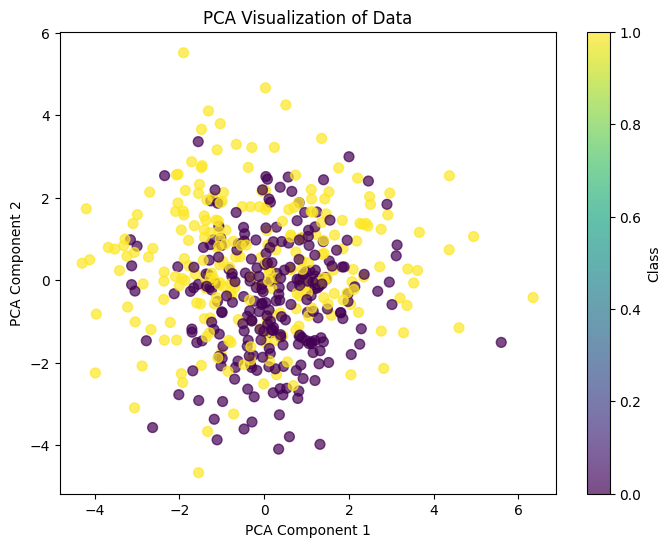

Linear SVM Accuracy: 0.8733333333333333
RBF SVM Accuracy: 0.9466666666666667
The dataset is likely nonlinear.


In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset
X, y = make_classification(n_samples=500, n_features=20, n_informative=15, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # For PCA visualization

# Continue with your original code
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title("PCA Visualization of Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Class')
plt.show()

# Train Linear SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
linear_accuracy = accuracy_score(y_test, y_pred_linear)
print("Linear SVM Accuracy:", linear_accuracy)

# Train RBF SVM for comparison
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)
print("RBF SVM Accuracy:", rbf_accuracy)

# Compare accuracies
if linear_accuracy < rbf_accuracy:
    print("The dataset is likely nonlinear.")
else:
    print("The dataset is likely linear.")


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

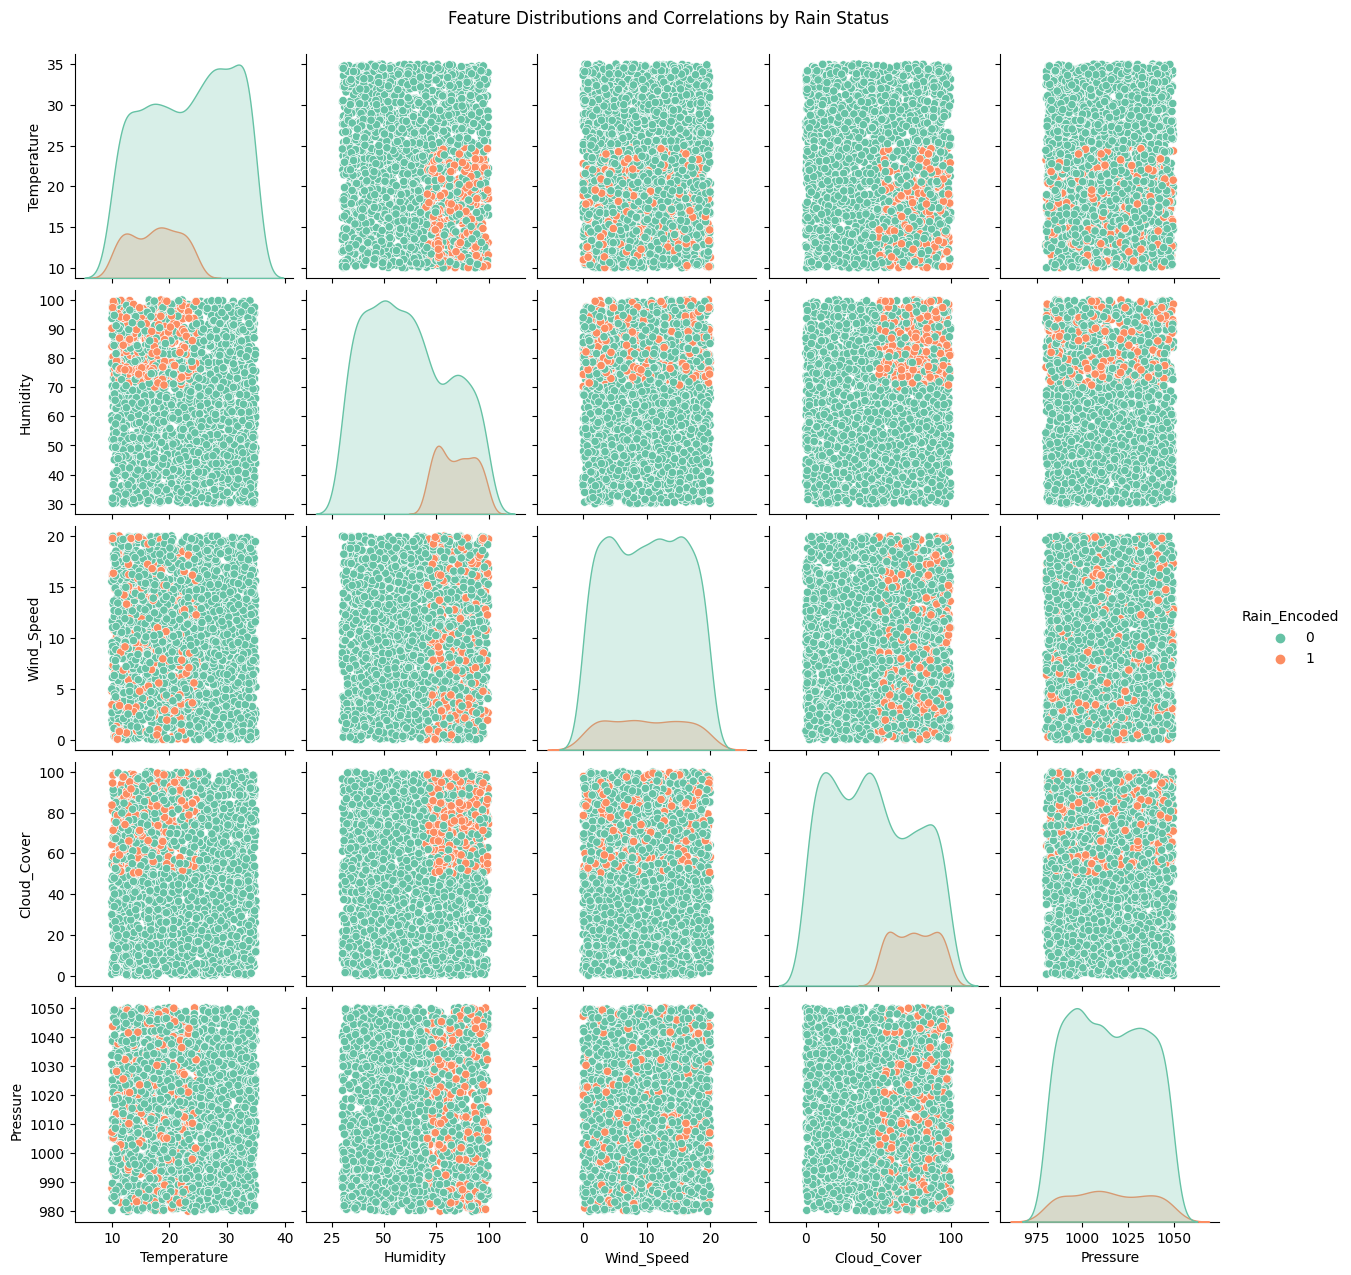

In [12]:
# Visualization
sns.pairplot(data, vars=['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure'], 
             hue='Rain_Encoded', diag_kind='kde', palette='Set2')
plt.suptitle("Feature Distributions and Correlations by Rain Status", y=1.02)
plt.show()

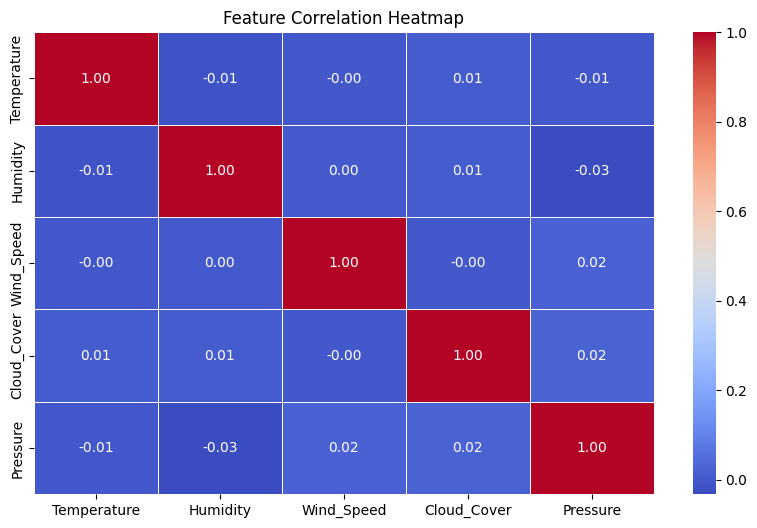

<Figure size 1500x1000 with 0 Axes>

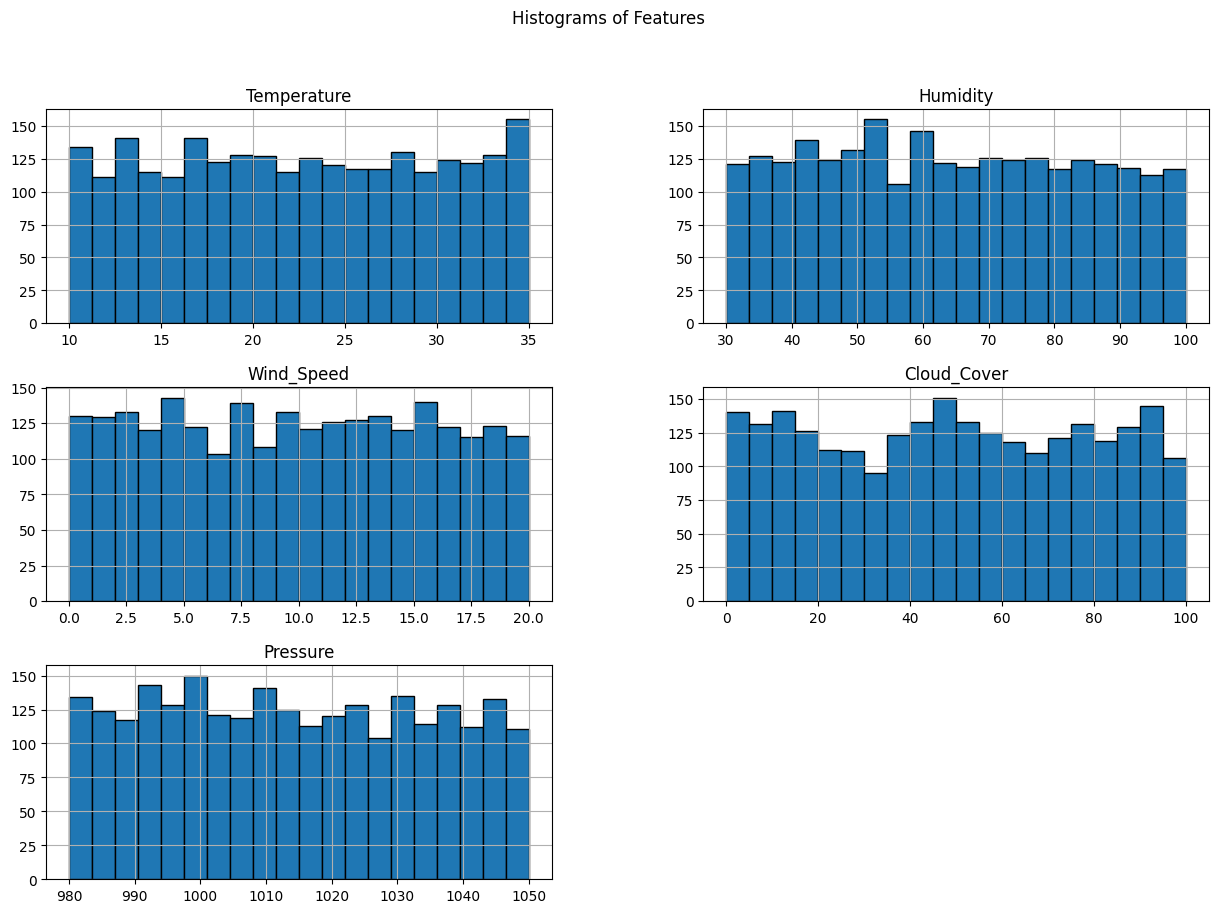

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Figure size 1000x600 with 0 Axes>

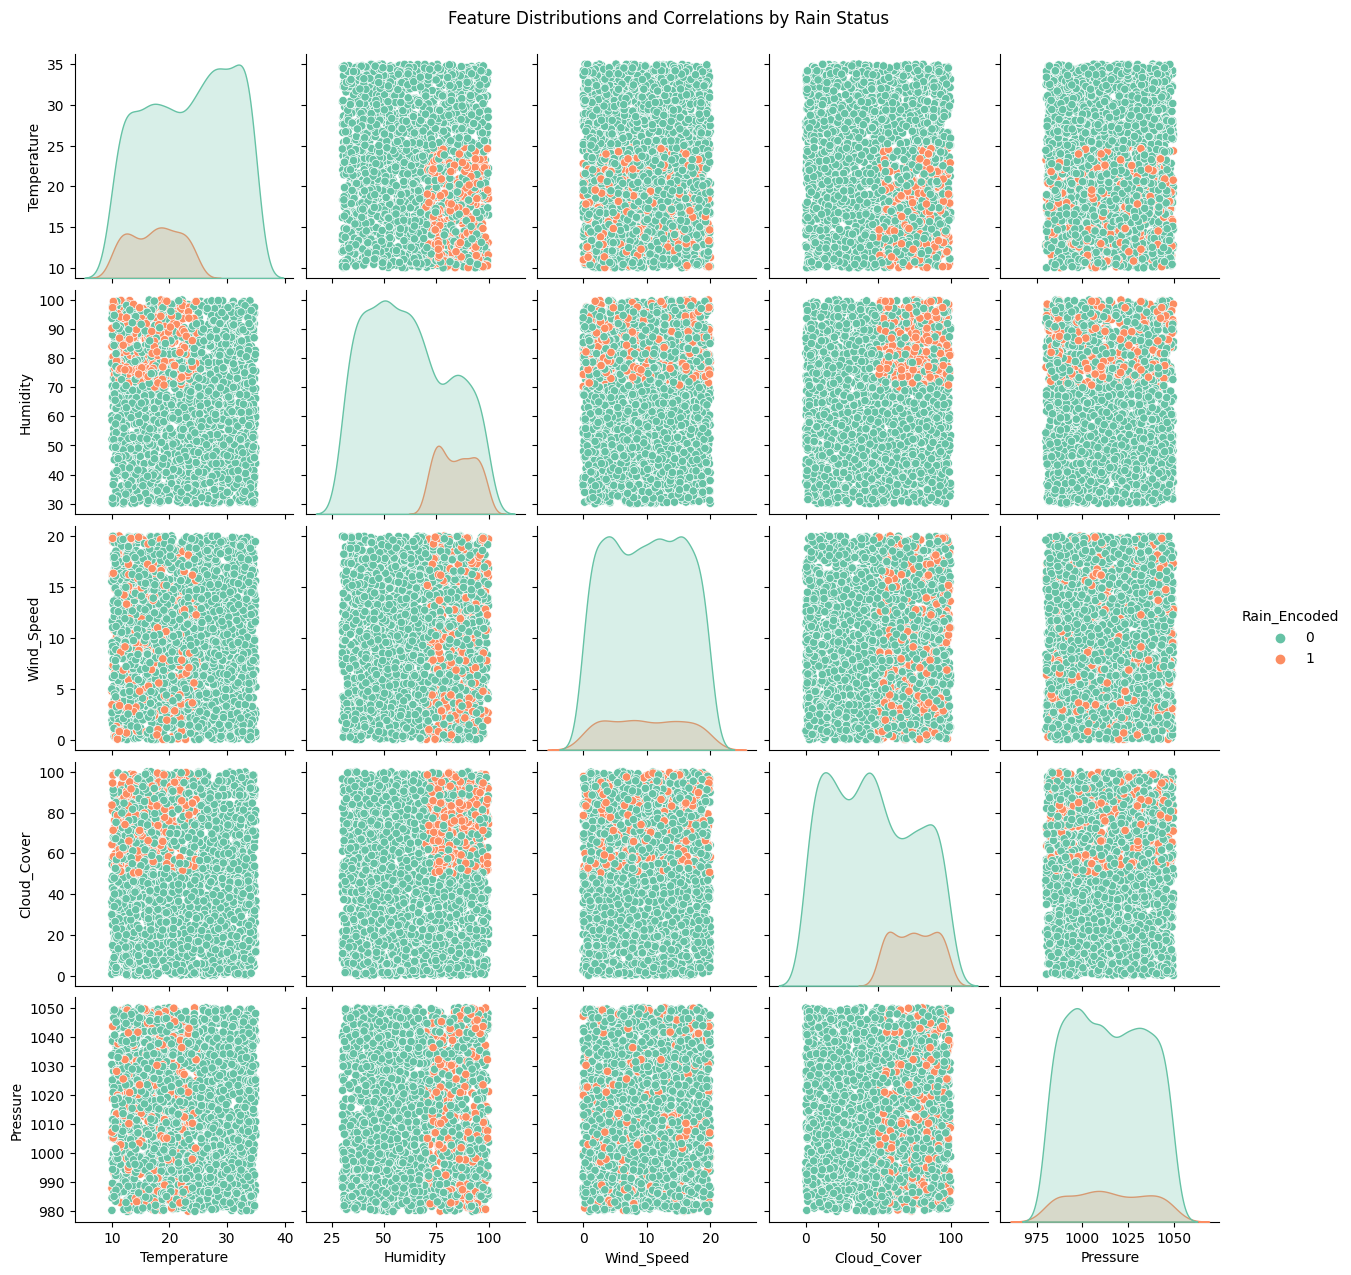

In [13]:
# 1. Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = data[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



# 3. Histogram for Feature Distributions
plt.figure(figsize=(15, 10))
data[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of Features")
plt.show()

# 4. Pairplot with Target Variable (Rain_Encoded)
plt.figure(figsize=(10, 6))
sns.pairplot(data, vars=['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure'], hue='Rain_Encoded', diag_kind='kde', palette='Set2')
plt.suptitle("Feature Distributions and Correlations by Rain Status", y=1.02)
plt.show()




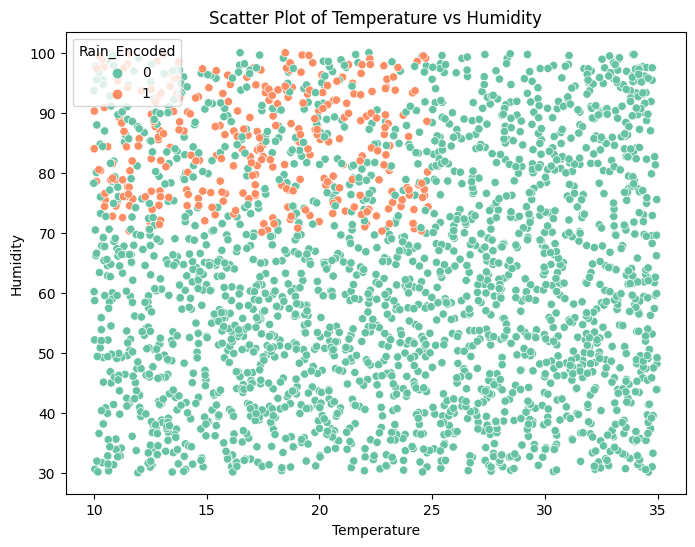

In [14]:
# Scatter Plot for Pairwise Relationships between Two Features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Humidity', hue='Rain_Encoded', data=data, palette='Set2')
plt.title("Scatter Plot of Temperature vs Humidity")
plt.show()


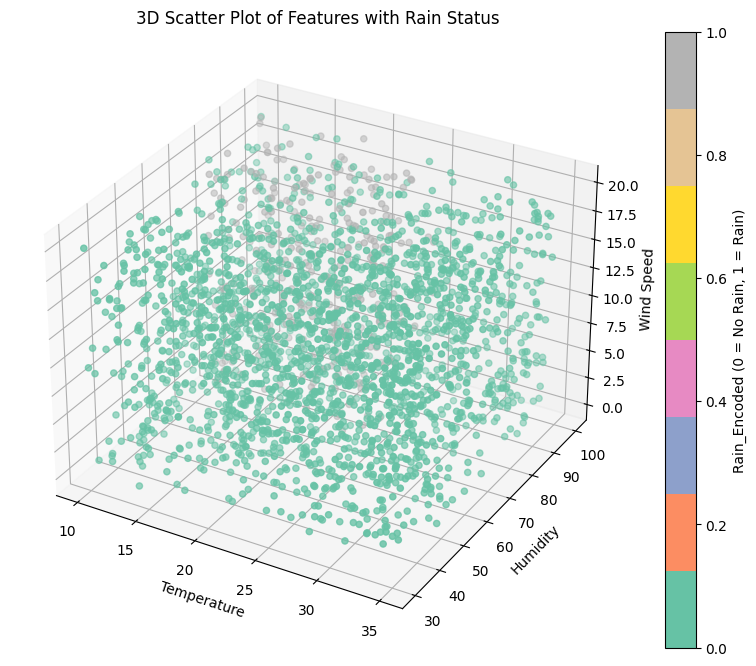

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot for Temperature, Humidity, and Wind Speed
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(data['Temperature'], data['Humidity'], data['Wind_Speed'], c=data['Rain_Encoded'], cmap='Set2')

# Labels and title
ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Wind Speed')
ax.set_title('3D Scatter Plot of Features with Rain Status')

# Show color bar
fig.colorbar(scatter, label='Rain_Encoded (0 = No Rain, 1 = Rain)')

plt.show()


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
svm_model = SVC()
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Train and evaluate each kernel
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {kernel} kernel: {accuracy:.4f}")

Accuracy with linear kernel: 0.8400
Accuracy with poly kernel: 0.8800
Accuracy with rbf kernel: 0.9600
Accuracy with sigmoid kernel: 0.8100


In [18]:
grid_search = GridSearchCV(
    svm_model, param_grid, cv=5, scoring='accuracy', verbose=2
)  # 5-fold cross-validation, accuracy as the scoring metric, verbose for progress

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)  # Train models for all parameter combinations and find the best one

# Extract the best hyperparameters and the best model
best_params = grid_search.best_params_  # Best combination of hyperparameters
best_model = grid_search.best_estimator_  # Best trained model

# Print the best parameters
# Print the best parameters with their values
print("Best Parameters and Values:")
for param, value in best_params.items():
    print(f"{param}: {value}")
import numpy as np

# Calculate the variance of each feature
feature_variances = np.var(X_scaled, axis=0)  # Variance along each feature (column)

# Calculate the number of features
n_features = X_scaled.shape[1]

# Calculate gamma using the 'scale' method
gamma = 1 / (n_features * np.mean(feature_variances))  # Mean variance across all features

print("Calculated Gamma:", gamma)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scal

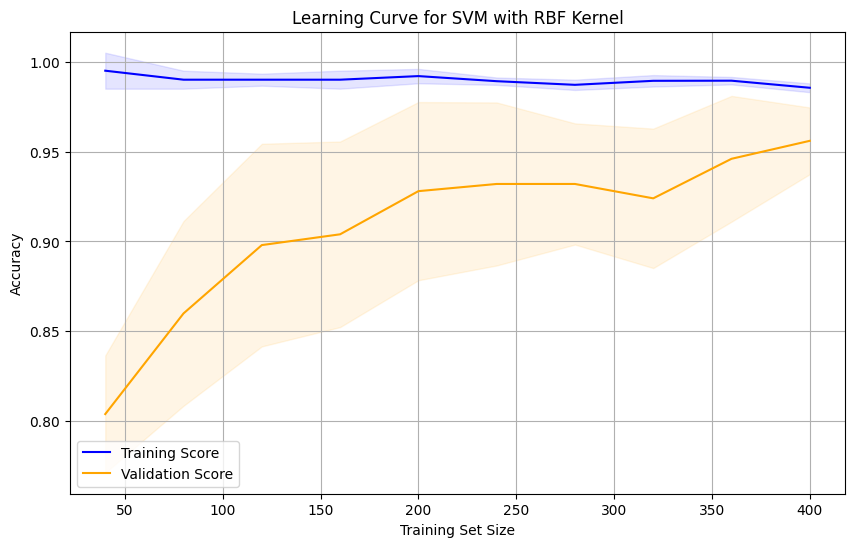

In [19]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the learning curve
def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )
    
    # Calculate mean and standard deviation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
    
    plt.plot(train_sizes, val_mean, label="Validation Score", color="orange")
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="orange")
    
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Define an SVM model with the best kernel (for example: 'rbf')
svm_model = SVC(kernel='rbf')

# Plot learning curve
plot_learning_curve(svm_model, X_scaled, y, title="Learning Curve for SVM with RBF Kernel")
